# Speech Emotion Detection
### Introduction
Speech Emotion Detection is an important tool that serves as an important asset in the world of Artificial Intelligence. By leveraging these techniques, we tend to improve our day to day with the implementations of these models. Through this notebook, we'll use **LSTM(Long Short Tem Memory) Model** to predict the Speech Emotion of an Individual. 

### Dataset
For this Project, we've used, **Ravdess Emotion Speech Audio Dataset**, which contains 1440 files: 60 trials per actor x 24 actors = 1440. It has 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes **calm, happy, sad, angry, fearful, surprise, and disgust expressions**. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

You can refer to **[Ravdess Emotion Speech Audio Dataset](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio)** from here.

So, without wasting any time, let's dive into it!

# Data Preparation
Data Preparation includes preparing the data in a Dataframe, importing Python Libraries and so on.

In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lib
import librosa.display as libdis
from IPython.display import Audio

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, let's load the dataset in a Pandas Dataframe

In [2]:
Ravdess_DS = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
dataset = os.listdir(Ravdess_DS)

loc = []
emotions = []

for item in dataset:
    actor = os.listdir(Ravdess_DS + item)
    for file in actor:
        name = file.split('.')[0]
        parts = name.split('-')
        emotions.append(int(parts[2]))
        loc.append(Ravdess_DS + item + '/' + file)
        
speech = pd.DataFrame(emotions, columns=['Emotions'])
location = pd.DataFrame(loc, columns=['Files'])

df = pd.concat([location, speech], axis=1)

df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

df.head()

Files  Emotions
0  /kaggle/input/ravdess-emotional-speech-audio/a...  surprise
1  /kaggle/input/ravdess-emotional-speech-audio/a...   neutral
2  /kaggle/input/ravdess-emotional-speech-audio/a...   disgust
3  /kaggle/input/ravdess-emotional-speech-audio/a...   disgust
4  /kaggle/input/ravdess-emotional-speech-audio/a...   neutral

In [3]:
df.Emotions.value_counts()

surprise    192
disgust     192
fear        192
sad         192
calm        192
happy       192
angry       192
neutral      96
Name: Emotions, dtype: int64

We can see that, we have almost all files almost balanced, each of 192 audio files. Only the exception is Neutral, which we can ignore as of now. 

Let's move on to EDA and analyse our dataset.

# Explortatory Data Analysis
Starting with the distributions

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'surprise'),
  Text(1, 0, 'neutral'),
  Text(2, 0, 'disgust'),
  Text(3, 0, 'fear'),
  Text(4, 0, 'sad'),
  Text(5, 0, 'calm'),
  Text(6, 0, 'happy'),
  Text(7, 0, 'angry')])

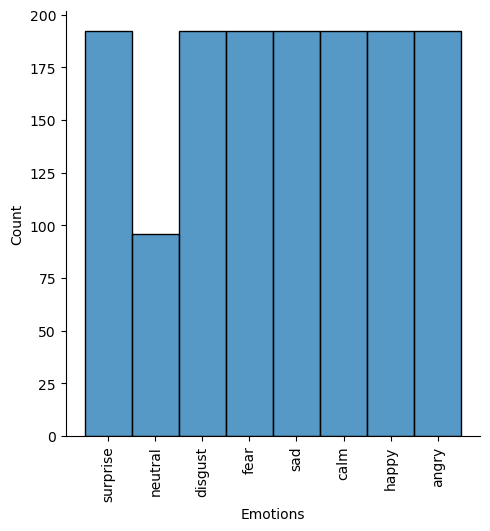

In [4]:
sns.displot(df['Emotions'])
plt.xticks(rotation=90)

Making a helper function that will help us to plot **Spectogram and Waveplot**

In [5]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(6,4))
    plt.title(emotion, size=8)
    libdis.waveshow(data, sr = sample_rate)
    plt.show()
    
def spectogram(data, sample_rate, emotion): 
    x = lib.stft(data)
    xdecibels = lib.amplitude_to_db(abs(x))
    plt.figure(figsize=(6,4))
    plt.title(emotion, size=8)
    libdis.specshow(xdecibels, sr = sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    


## Plotting Different Emotions
### Surprise

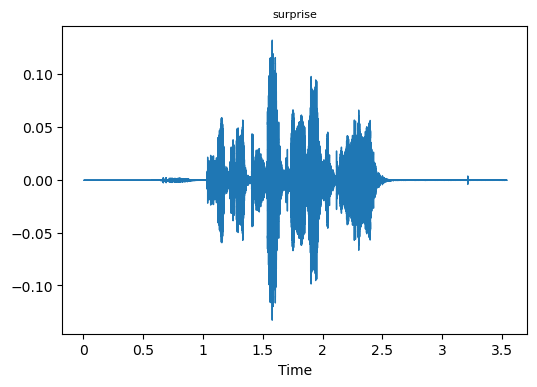

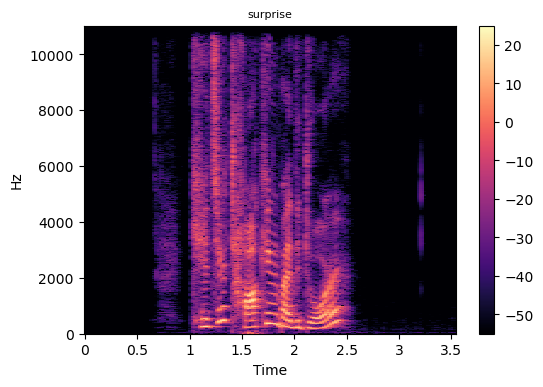

In [6]:
emotion = 'surprise'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Fear

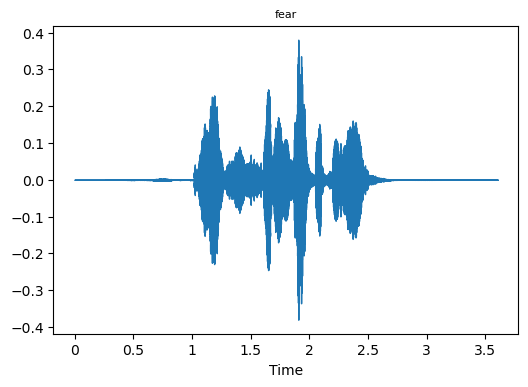

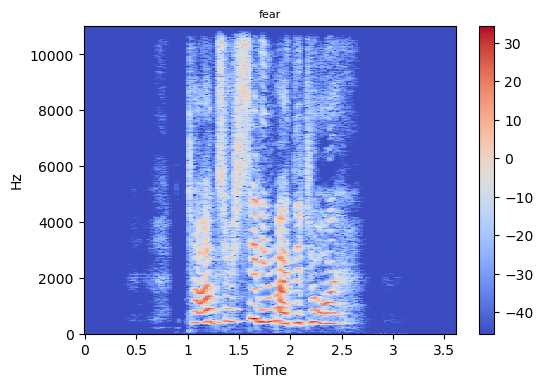

In [7]:
emotion = 'fear'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Disgust

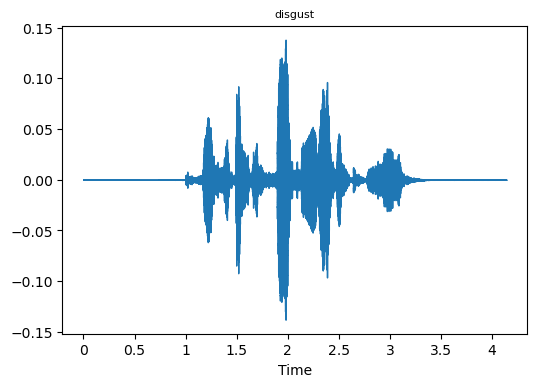

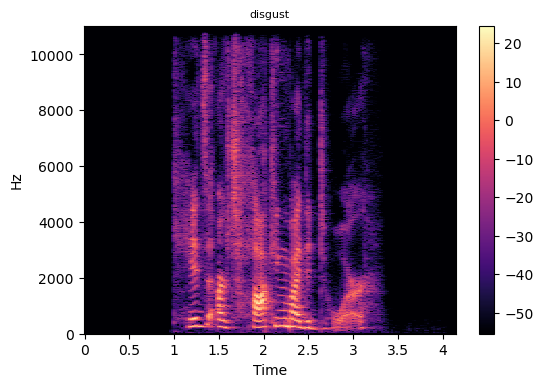

In [8]:
emotion = 'disgust'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Angry

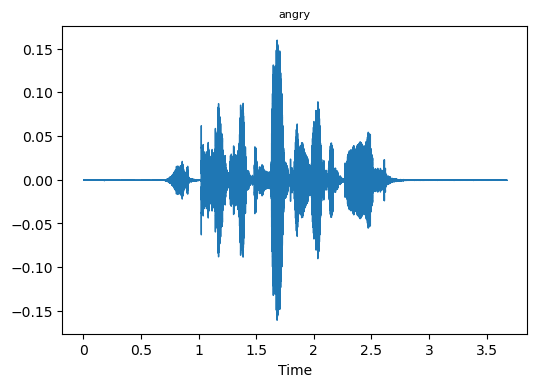

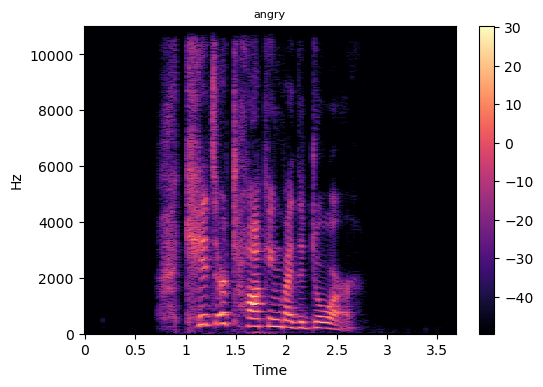

In [9]:
emotion = 'angry'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

### Neutral

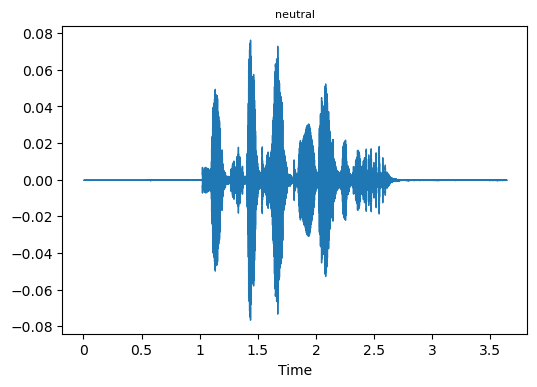

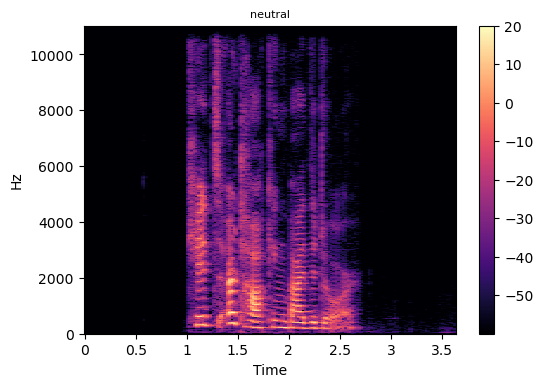

In [10]:
emotion = 'neutral'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


### Sad

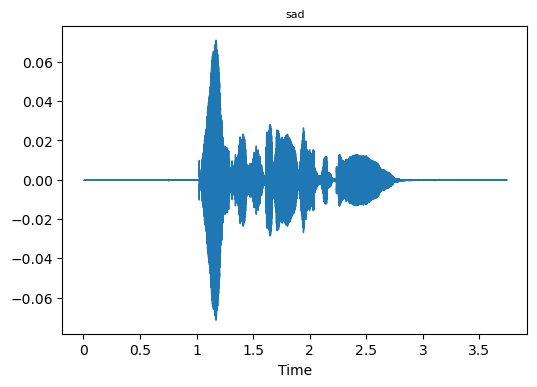

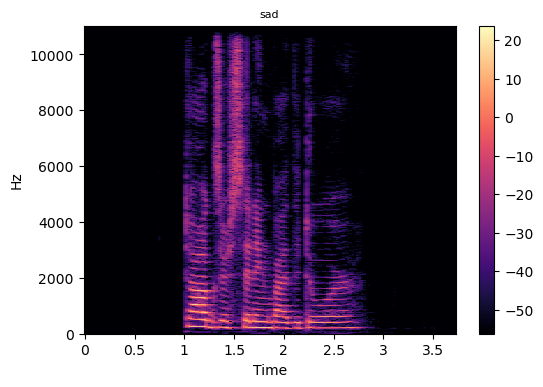

In [11]:
emotion = 'sad'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Calm

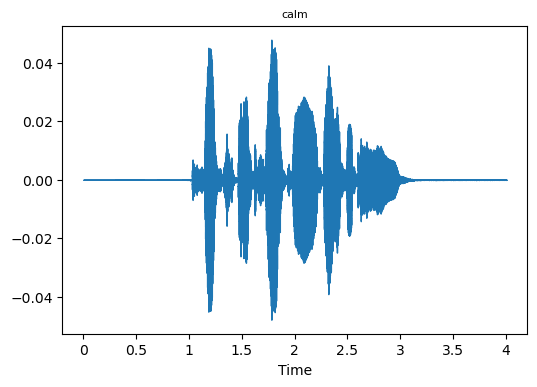

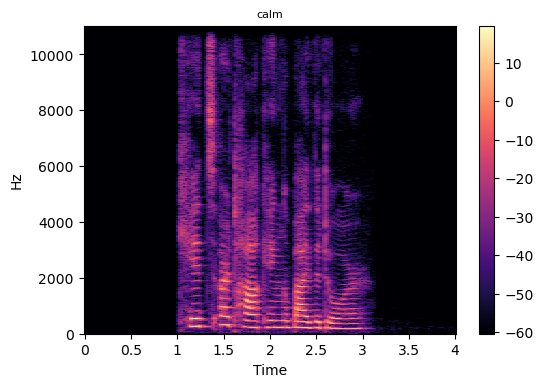

In [12]:
emotion = 'calm'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

### Happy

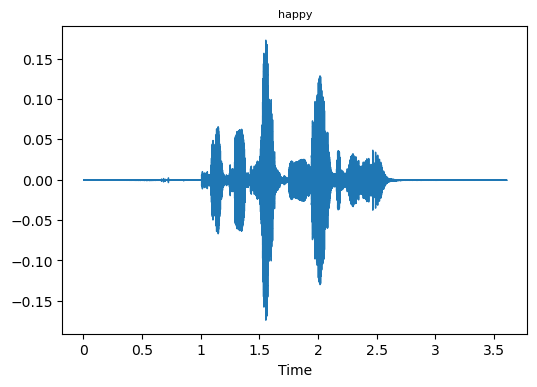

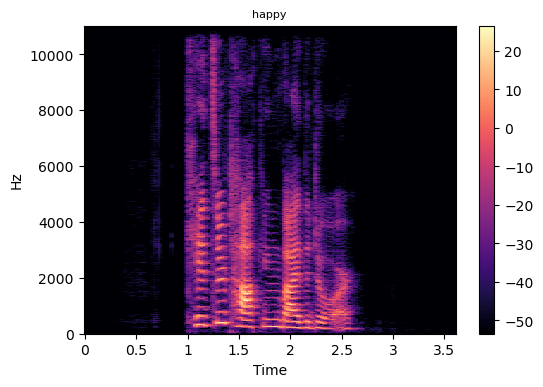

In [13]:
emotion = 'happy'
path = df['Files'][df['Emotions'] == emotion]
path = path.iloc[0]
data, sampling_rate = lib.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Engineering
The first step in any **Speech Recognition System** is to extract features i.e. identify the components of the audio signal that are good for identifying the linguistic content and discarding all the other stuff which carries information like background noise, emotion etc.

**Mel Frequency Capstral Coffefficients (MFCC) will help us to do so.**

In [14]:
def mel_freq_caps_coeff(file):
    y, sampling_rate = lib.load(file, duration = 3, offset = 0.5)
    mfcc = np.mean(lib.feature.mfcc(y = y, sr = sampling_rate, n_mfcc = 40).T, axis=0)
    return mfcc

In [15]:
X_mfcc = df['Files'].apply(lambda x: mel_freq_caps_coeff(x))
X_mfcc

0       [-540.1829, 44.150517, -17.58854, 11.224457, -...
1       [-614.99786, 64.27647, -12.088929, 9.41706, -5...
2       [-502.41617, 62.017586, -17.925268, 6.944143, ...
3       [-604.7727, 67.434425, -16.502441, 10.641715, ...
4       [-575.75745, 62.652485, -14.190676, 4.8387, -6...
                              ...                        
1435    [-602.25903, 62.618546, -8.647368, 8.951977, 5...
1436    [-450.15335, 64.146095, -2.0737221, 17.278877,...
1437    [-561.08777, 83.76006, -7.141875, 15.231575, 1...
1438    [-496.09958, 55.643986, 16.767817, 21.994934, ...
1439    [-306.2437, 43.048687, -17.571423, 14.701662, ...
Name: Files, Length: 1440, dtype: object

We need to convert it to a numpy array for further processing

In [16]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 40)

# Data Preprocessing
Now we need to expand the shape of the numpy array because our **LSTM model** with only expects a 3-d array as input to the model.

Hence **Expanding Shape**

In [17]:
X = np.expand_dims(X, -1)
X.shape

(1440, 40, 1)

### Encoding the Categorical Features i.e. the Emotions
We're using Label Encoder for the Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(df['Emotions'])
y

array([7, 5, 2, ..., 6, 2, 0])

# LSTM Model
Let's create the **sequential model**. It allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other. 

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(8, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 69,956
Trainable params: 69,956
Non-trainable params: 0
_________________________________________________________________


## Model Training
Training our model with a batch size of 512 and with an epoch of 100

In [20]:
history = model.fit(X, y, validation_split=0.2, batch_size=10, epochs=100)

Epoch 1/100
116/116 [==============================] - 7s 37ms/step - loss: 2.0152 - accuracy: 0.1875 - val_loss: 1.9597 - val_accuracy: 0.2153
Epoch 2/100
116/116 [==============================] - 3s 27ms/step - loss: 1.9269 - accuracy: 0.2517 - val_loss: 1.9582 - val_accuracy: 0.2674
Epoch 3/100
116/116 [==============================] - 3s 26ms/step - loss: 1.8638 - accuracy: 0.2830 - val_loss: 1.9546 - val_accuracy: 0.2153
Epoch 4/100
116/116 [==============================] - 3s 26ms/step - loss: 1.8321 - accuracy: 0.2734 - val_loss: 1.9469 - val_accuracy: 0.2569
Epoch 5/100
116/116 [==============================] - 3s 26ms/step - loss: 1.8253 - accuracy: 0.2925 - val_loss: 1.9174 - val_accuracy: 0.2639
Epoch 6/100
116/116 [==============================] - 3s 26ms/step - loss: 1.7788 - accuracy: 0.3125 - val_loss: 1.8791 - val_accuracy: 0.2708
Epoch 7/100
116/116 [==============================] - 3s 27ms/step - loss: 1.7626 - accuracy: 0.3238 - val_loss: 1.8740 - val_accuracy:

## Results

In [21]:
print(f"Test Accuracy: {max(history.history['val_accuracy']) * 100} %")

Test Accuracy: 33.68055522441864 %


# Summary
In the study, an LSTM (Long Short-Term Memory) model was employed for speech emotion recognition using a specific dataset. The training phase yielded a relatively high accuracy of 97%, indicating that the model successfully learned to classify emotions based on speech features. However, during the testing phase, the model's performance significantly dropped, achieving only 30% accuracy.

### Vulnerabilities:

**Dataset bias:** The dataset used for training the LSTM model might be biased or not representative of real-world scenarios. If the training dataset primarily consists of specific speech patterns or limited emotional expressions, the model may struggle to recognize emotions in different contexts. This dataset bias can lead to poor generalization when faced with new data during the testing phase.

**Insufficient data:** The LSTM model might have encountered a lack of diverse and sufficient data during the training process. With limited data, the model may fail to capture the full range of variations in speech features associated with different emotional states. As a result, it may struggle to generalize well to new instances, leading to reduced performance on the test set.

**Model complexity:** The LSTM model's architecture and hyperparameters could contribute to its vulnerability. If the model is overly complex or contains too many parameters, it may become challenging to optimize effectively. Complex models can be prone to overfitting and may require more extensive training data or regularization techniques to achieve better generalization.

Addressing these vulnerabilities can enhance the performance of the LSTM model for speech emotion recognition. Techniques such as regularization, data augmentation, diverse dataset collection, and feature engineering can be explored to mitigate these limitations and improve the model's overall accuracy.